### **Config**

In [1]:
import os
import sys

sys.path.insert(0, '/home/marco/epfl/magma/')
import config

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [2]:
BART_DIR = config.MAGMA_DIR+'fine-tuning/ft_bart_bull_para_embed_gas16_lr5e-05/'
T5_DIR = config.MAGMA_DIR+'fine-tuning/ft_t5_bull_para_embed_gas16_lr5e-05/'
PEGASUS_DIR = config.MAGMA_DIR+'fine-tuning/ft_pegasus_bull_para_embed_gas64_lr5e-05/'

PEGASUS_MERGED_OVERLAPS_DIR = config.MAGMA_DIR+\
    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_gas64_lr5e-05/'
PEGASUS_MERGED_OVERLAPS_BYBOOK_DIR = config.MAGMA_DIR+\
    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05/'

FILE_PREFIX = '_content_drive_My Drive_MAGMA_ Summarization_fine-tuning_'

### **Init**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import re
import pandas as pd
from tqdm import tqdm
from textwrap import fill
tqdm.pandas()

### **Function Definition**

##### Plot Models Comparison

In [4]:
def plot_compare_models(split, model_names, model_files, metrics_names, metrics):
    import json
    
    results = np.zeros((len(metrics), len(model_files)))
    
    for i, f in enumerate(model_files):
        f += ('_'+split+'.json')
        with open(f) as f_json:
            d = json.load(f_json)
            results[:, i] = [round(d[m], 2) for m in metrics]
    
    dim = 0.07*len(model_names)
    x = np.arange(len(metrics))
    var = np.linspace(-dim, dim, len(model_names))
    width = dim*2 / (len(model_names)-1)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    models_plots = []
    for i, (model, v) in enumerate(zip(model_names, var)):
        models_plots.append(ax.bar(x +v, results[:, i], width, label=model))
    
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    for p in models_plots:
        autolabel(p)
    
    fig.tight_layout()

    plt.show()

In [5]:
def print_compare_models(split, models_names, models_files, dataset_dir):
    source_file = dataset_dir+split+'.source'
    target_file = dataset_dir+split+'.target'
    
    with open(source_file, 'r') as src,\
        open(target_file, 'r') as tgt:
            src_lines = src.readlines()
            tgt_lines = tgt.readlines()
    
    results = []
    for f in models_files:
        f += ('_'+split+'.txt')
        with open(f, 'r') as fp:
            results.append(fp.readlines())

    for i, (s, t) in enumerate(zip(src_lines, tgt_lines)):
        print(s)
        for name, res in zip(models_names, results):
            print(name+':')
            print(res[i])
        print('Reference:')
        print(t)
        print(''.join(['#']*100))
        print(''.join(['#']*100))
        print()

### Compare Models Out of the Box

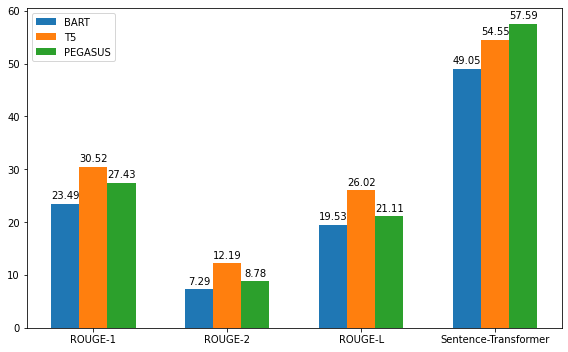

In [8]:
plot_compare_models(
    'val',
    
    ['BART',
    'T5',
    'PEGASUS'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    T5_DIR+'t5-large_bull_para_embed',
    PEGASUS_DIR+'google_pegasus-large_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

### Fine-Tuning Improvements

##### BART

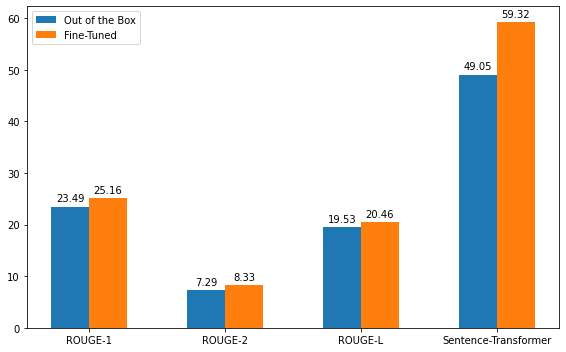

In [23]:
plot_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

In [24]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

##### T5

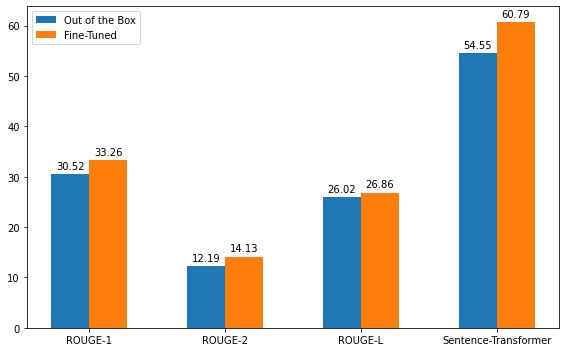

In [21]:
plot_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [T5_DIR+'t5-large_bull_para_embed',
    T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

In [22]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [T5_DIR+'t5-large_bull_para_embed',
    T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

##### PEGASUS

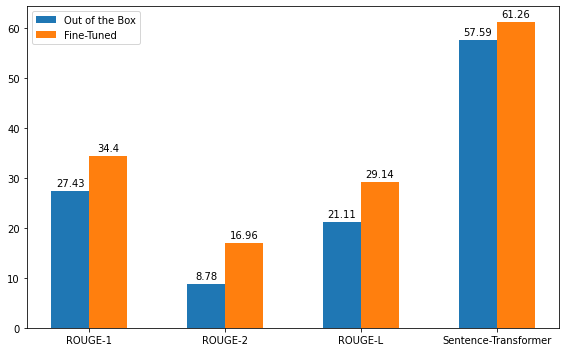

In [19]:
plot_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [PEGASUS_DIR+'google_pegasus-large_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

In [20]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [PEGASUS_DIR+'google_pegasus-large_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

### Compare Fine-Tuned Models

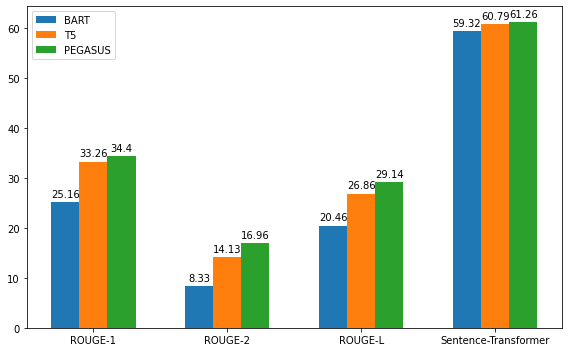

In [17]:
plot_compare_models(
    'val',
    
    ['BART',
    'T5',
    'PEGASUS'],
    
    [BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed',
    T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

In [18]:
print_compare_models(
    'val',
    
    ['T5',
    'PEGASUS'],
    
    [T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

### PEGASUS GPS improvements

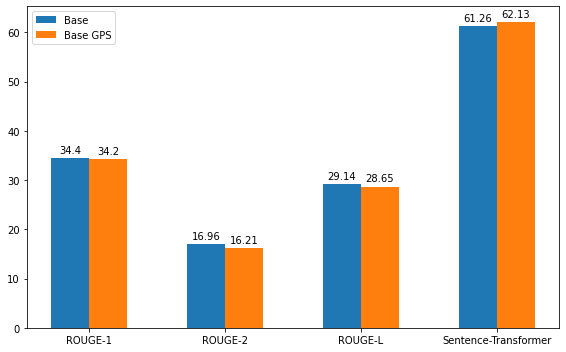

In [26]:
plot_compare_models(
    'val',
    
    ['Base',
    'Base GPS'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed_gps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

### PEGASUS Compare Base, Base by Book

In [ ]:
plot_compare_models(
    'val',
    
    ['Base',
    'Base by Book'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

##### After GPS

In [ ]:
plot_compare_models(
    'val',
    
    ['Base GPS',
    'Base by Book GPS'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed_gps',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook_gps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

### PEGASUS Compare Base, Merged Overlaps

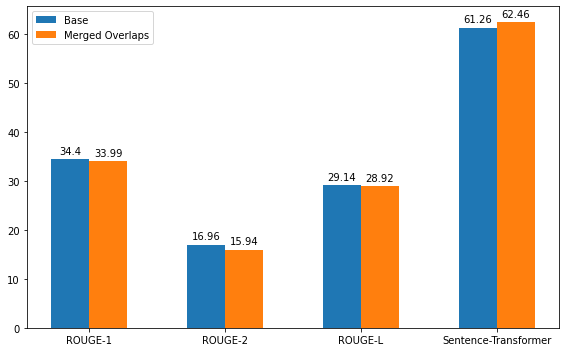

In [27]:
plot_compare_models(
    'val',
    
    ['Base',
    'Merged Overlaps'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_MERGED_OVERLAPS_DIR+FILE_PREFIX+\
        'ft_pegasus_bull_para_embed_merged_overlaps_gas64_lr5e-05_checkpoint-343_bull_para_embed_merged_overlaps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

##### After GPS

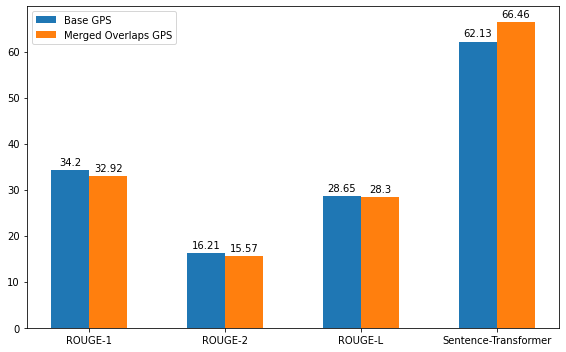

In [28]:
plot_compare_models(
    'val',
    
    ['Base GPS',
    'Merged Overlaps GPS'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed_gps',
    PEGASUS_MERGED_OVERLAPS_DIR+FILE_PREFIX+\
        'ft_pegasus_bull_para_embed_merged_overlaps_gas64_lr5e-05_checkpoint-343_bull_para_embed_merged_overlaps_gps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

### PEGASUS Compare Base by Book, Merged Overlaps by Book

In [ ]:
plot_compare_models(
    'val',
    
    ['Base by Book',
    'Merged Overlaps by Book'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook',
    PEGASUS_MERGED_OVERLAPS_DIR+FILE_PREFIX+\
        'ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05_checkpoint-343_bull_para_embed_merged_overlaps_bybook'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)

##### After GPS

In [ ]:
plot_compare_models(
    'val',
    
    ['Base by Book',
    'Merged Overlaps by Book'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook_gps',
    PEGASUS_MERGED_OVERLAPS_DIR+FILE_PREFIX+\
        'ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05_checkpoint-343_bull_para_embed_merged_overlaps_bybook_gps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine']
)